In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np;
import scipy;
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

In [2]:
churnData = pd.read_csv(r"C:\Users\aykut\OneDrive\Belgeler\GitHub\IH_RH_DA_FT_AUG_2022\Class_Materials\Machine_Learning\Supervised_Learning\Lab\Data\DATA_Customer-Churn.csv")

In [3]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [4]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churnData["Churn"].isnull().value_counts()

False    7043
Name: Churn, dtype: int64

In [6]:
churnData['TotalCharges'].median()

1397.475

In [7]:
churnData['TotalCharges'].fillna(churnData['TotalCharges'].median(), inplace=True)

In [8]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Splitting the data

In [10]:
y = churnData['Churn'] #Target variable

In [11]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=.20,random_state=42)

## Decision Tree Classifier

In [12]:
y = churnData['Churn']

In [13]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=.20,random_state=42)

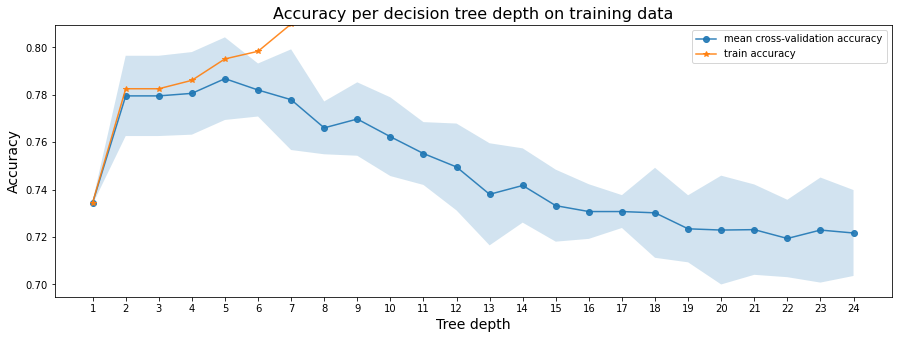

In [14]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [15]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-5 tree achieves the best mean cross-validation accuracy 78.68287 +/- 0.87144% on training dataset


In [16]:
model = DecisionTreeClassifier(max_depth=5)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

,Error_metric,Train,Test
0,Accuracy,0.795172,0.790632
1,Precision,0.675565,0.657258
2,Recall,0.439840,0.436997


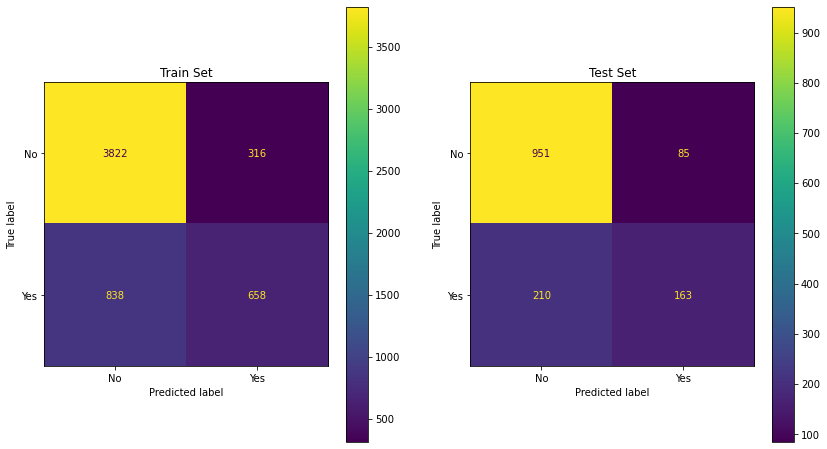

In [17]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [18]:
scores=cross_val_score(model, X_train, y_train, cv=5, scoring = 'accuracy')

In [19]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Upsampling the Data

In [20]:
category_0 = churnData[churnData['Churn'] == 'No']
category_1 = churnData[churnData['Churn'] == 'Yes']

In [21]:
category_1_up = category_1.sample(len(category_0),replace=True)

In [22]:
print(category_1_up.shape)

(5174, 16)


In [23]:
data = pd.concat([category_0,category_1_up],axis=0)

data = data.sample(frac=1)

In [24]:
data['Churn'].value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

### Upsampled Data 

In [25]:
y = data['Churn']

X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [26]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=.20,random_state=42)

In [27]:
model = DecisionTreeClassifier(max_depth=5)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

,Error_metric,Train,Test
0,Accuracy,0.750423,0.757488
1,Precision,0.760903,0.783644
2,Recall,0.727692,0.720952


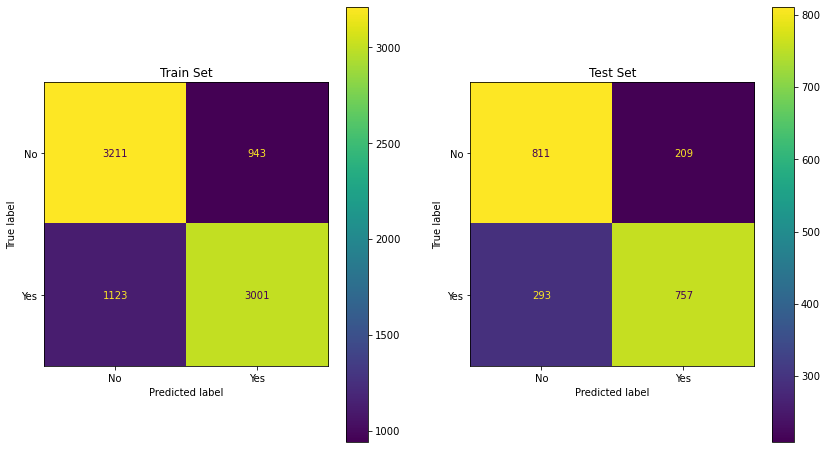

In [28]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Downsampled Data

In [29]:
category_0_down = category_0.sample(len(category_1))

In [30]:
data = pd.concat([category_0_down,category_1],axis=0)

In [31]:
data = data.sample(frac=1)

In [32]:
data['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [33]:
y = data['Churn']

X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]






In [34]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=.20,random_state=42)

In [35]:
model = DecisionTreeClassifier(max_depth=5)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

,Error_metric,Train,Test
0,Accuracy,0.753846,0.735294
1,Precision,0.714932,0.703016
2,Recall,0.844920,0.812332


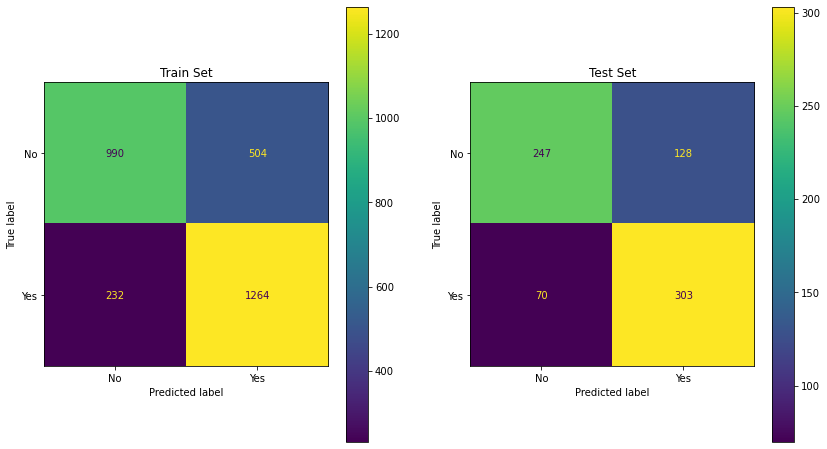

In [36]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

## Running KNN with balanced Data

### Downsampled Data 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=.20,random_state=42)
neigh = KNeighborsClassifier(n_neighbors=23,weights='uniform')
neigh.fit(X_train, y_train)

y_pred=neigh.predict(X_test)
y_pred_train=neigh.predict(X_train)

#model.predict_proba(inputdata)

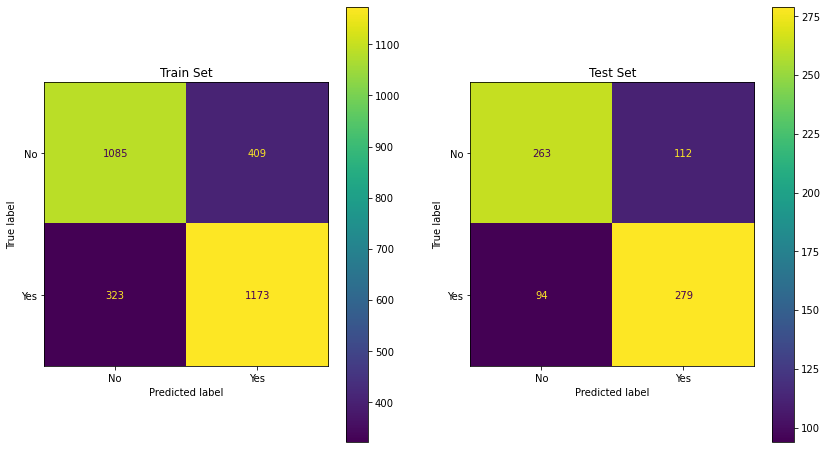

In [38]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(neigh,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(neigh,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.76,0.74
1,Precision,0.74,0.70
2,Recall,0.78,0.81


In [40]:
scores=cross_val_score(neigh, X_train, y_train, cv=5)

scores.mean()

0.7327759197324413

### Upsampled Data

In [41]:


category_0 = churnData[churnData['Churn'] == 'No']
category_1 = churnData[churnData['Churn'] == 'Yes']

category_1_up = category_1.sample(len(category_0),replace=True)

data = pd.concat([category_0,category_1_up],axis=0)

data = data.sample(frac=1)

In [42]:

y = data['Churn']

X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=.20,random_state=42)
neigh = KNeighborsClassifier(n_neighbors=23,weights='uniform')
neigh.fit(X_train, y_train)

y_pred=neigh.predict(X_test)
y_pred_train=neigh.predict(X_train)

#model.predict_proba(inputdata)

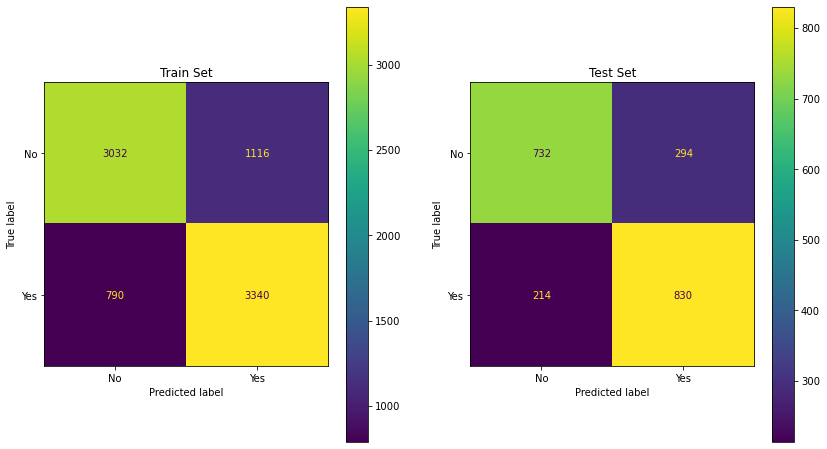

In [43]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(neigh,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(neigh,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.77,0.75
1,Precision,0.75,0.74
2,Recall,0.81,0.80


In [45]:
scores=cross_val_score(neigh, X_train, y_train, cv=5)

In [46]:
scores.mean()

0.7499407446327189

## Fitting Logistic Regression with balanced Data

### Upsampled

In [47]:
category_0 = churnData[churnData['Churn'] == 'No']
category_1 = churnData[churnData['Churn'] == 'Yes']

category_1_up = category_1.sample(len(category_0),replace=True)

data = pd.concat([category_0,category_1_up],axis=0)

data = data.sample(frac=1)


y = data['Churn']

X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=.20,random_state=42)

log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)


scores=cross_val_score(model, X_train, y_train, cv=5)
                       
scores.mean()                       
                       


0.7406356086810573

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.73,0.73
1,Precision,0.73,0.74
2,Recall,0.74,0.74


### Downsampling

In [49]:
category_0_down = category_0.sample(len(category_1))

data = pd.concat([category_0_down,category_1],axis=0)

data = data.sample(frac=1)

y = data['Churn']

X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=.20,random_state=42)

In [50]:

log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)


scores=cross_val_score(model, X_train, y_train, cv=5)
                       
scores.mean()   

0.7167224080267558

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.72,0.76
1,Precision,0.70,0.75
2,Recall,0.79,0.80


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf = RandomForestClassifier(max_depth=5,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7622073578595318
0.7713903743315508


In [55]:
clf.score(X_train, y_train)

0.7622073578595318

In [56]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=3,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.73076923, 0.70735786, 0.72240803, 0.73244147, 0.74080268])

In [58]:
np.std(cross_val_scores)

0.011321947076796486

In [60]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes
